In [24]:
%matplotlib inline

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ix
import networkx as nx
import graphistry

In [26]:
data_path = '/public/npatil4/networks/data/combined/'

In [27]:
file_year = data_path + 'data_2015_withNodes_year.txt'
data_year = pd.read_csv(file_year,
                        sep='|')

file_month = data_path + 'data_2015_withNodes_month.txt'
data_month = pd.read_csv(file_month,
                       sep='|')

file_day = data_path + 'data_2015_withNodes_day.txt'
data_day = pd.read_csv(file_day,
                        sep='|')

file_hour = data_path + 'data_2015_withNodes_hour.txt'
data_hour = pd.read_csv(file_hour,
                        sep='|')

In [28]:
def data_limited(df):
    
    mask = (
        (data_year.pick_long.between(-75,-73).values) & 
        (data_year.pick_lat.between(40,41).values) &
        (data_year.drop_long.between(-75,-73).values) & 
        (data_year.drop_lat.between(40,41).values)
        )
    
    return(mask)

def data_limited2(df):
    
    mask = (
        (data_year.pick_long.between(-74.02,-73.92).values) & 
        (data_year.pick_lat.between(40.70,40.85).values) &
        (data_year.drop_long.between(-74.02,-73.92).values) & 
        (data_year.drop_lat.between(40.70,40.85).values)
        )
    
    return(mask)

##### Trips in manhattan

In [29]:
mask = (data_limited2(data_year))
print 'Routes : ',sum(mask)
print 'Trips : ',data_year.trips[mask].sum()

11914860
126527283


In [172]:
len(data_year[mask].start.unique())

17620

##### Trips in manhattan >=500

In [30]:
mask1 = (data_limited2(data_year)) & (data_year['trips']>=500)
print 'Routes : ',sum(mask1)
print 'Trips : ',sum(data_year.trips[mask1])

7545
6175107


##### Trips in manhattan <500

In [31]:
mask2 = (data_limited2(data_year)) & (data_year['trips']<500)
print 'Routes : ',sum(mask2)
print 'Trips : ',sum(data_year.trips[mask2])

11907315
120352176


##### Graph Generation and total nodes

In [32]:
data_nwk =nx.DiGraph()
data_nwk = nx.from_pandas_dataframe(df = data_year[mask],
                                    source='start',
                                    target='stop',
                                    edge_attr=['trips'],
                                    create_using=data_nwk)

data_nwk1 =nx.DiGraph()
data_nwk1 = nx.from_pandas_dataframe(df = data_year[mask1],
                                    source='start',
                                    target='stop',
                                    edge_attr=['trips'],
                                    create_using=data_nwk1)

data_nwk2 =nx.DiGraph()
data_nwk2 = nx.from_pandas_dataframe(df = data_year[mask2],
                                    source='start',
                                    target='stop',
                                    edge_attr=['trips'],
                                    create_using=data_nwk2)

{
    'All':data_nwk.number_of_nodes(),
    'Frequent':data_nwk1.number_of_nodes(),
    'in-frequent':data_nwk2.number_of_nodes()
}

#### Degree distrbution of the graph

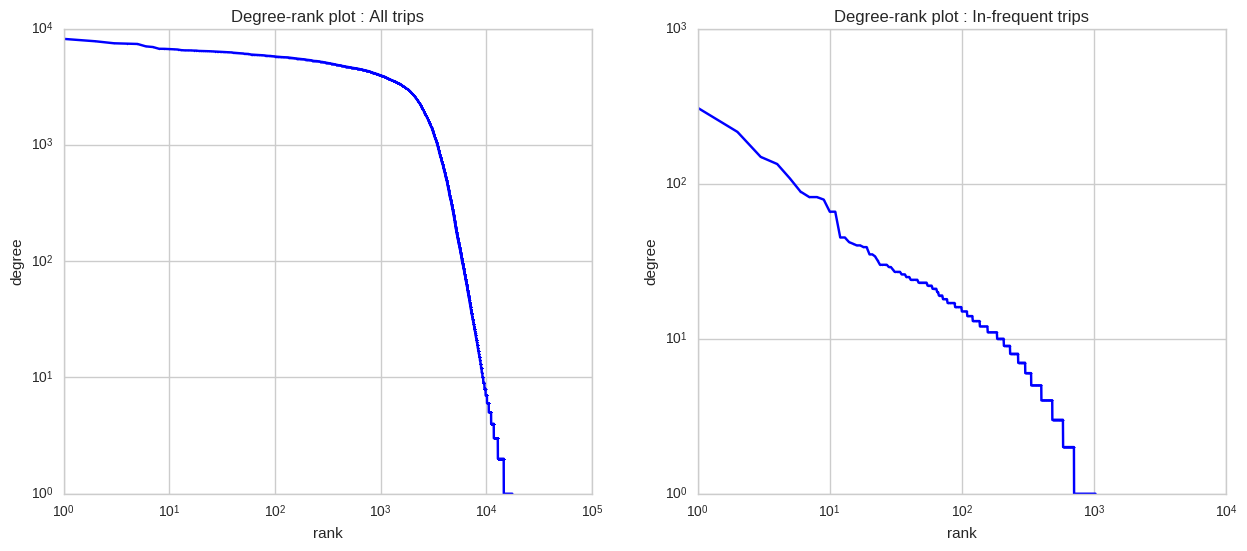

In [36]:
degree_plot = plt.figure(figsize=(15,6))
sns.set_style('whitegrid')

degree_plot.add_subplot(121)
degree_sequence = sorted(data_nwk.out_degree().values(),reverse=True)

plt.loglog(degree_sequence,
           'b-',
           marker='.',
           markersize =2,
           rasterized=False)
plt.title("Degree-rank plot : All trips")
plt.ylabel("degree")
plt.xlabel("rank")

degree_plot.add_subplot(122)
degree_sequence = sorted(data_nwk1.out_degree().values(),reverse=True)

plt.loglog(degree_sequence,
           'b-',
           marker='.',
           markersize =2,
           rasterized=False)
plt.title("Degree-rank plot : In-frequent trips")
plt.ylabel("degree")
plt.xlabel("rank")


#plt.savefig('../plots/DegreeDistribution.png',dpi=700)